# **Imports**

In [ ]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
!unzip /content/drive/MyDrive/Data_Mining/course_project_2/archive.zip -d /content/drive/MyDrive/Data_Mining/course_project_2/

Archive:  /content/drive/MyDrive/Data_Mining/course_project_2/archive.zip
  inflating: /content/drive/MyDrive/Data_Mining/course_project_2/CTU-IoT-Malware-Capture-1-1conn.log.labeled.csv  
  inflating: /content/drive/MyDrive/Data_Mining/course_project_2/CTU-IoT-Malware-Capture-20-1conn.log.labeled.csv  
  inflating: /content/drive/MyDrive/Data_Mining/course_project_2/CTU-IoT-Malware-Capture-21-1conn.log.labeled.csv  
  inflating: /content/drive/MyDrive/Data_Mining/course_project_2/CTU-IoT-Malware-Capture-3-1conn.log.labeled.csv  
  inflating: /content/drive/MyDrive/Data_Mining/course_project_2/CTU-IoT-Malware-Capture-34-1conn.log.labeled.csv  
  inflating: /content/drive/MyDrive/Data_Mining/course_project_2/CTU-IoT-Malware-Capture-35-1conn.log.labeled.csv  
  inflating: /content/drive/MyDrive/Data_Mining/course_project_2/CTU-IoT-Malware-Capture-42-1conn.log.labeled.csv  
  inflating: /content/drive/MyDrive/Data_Mining/course_project_2/CTU-IoT-Malware-Capture-48-1conn.log.labeled.csv  


# **Loading dataset**

In [ ]:
df_1 = pd.read_csv('/content/drive/MyDrive/Data_Mining/course_project_2/CTU-IoT-Malware-Capture-1-1conn.log.labeled.csv')
df_20 = pd.read_csv('/content/drive/MyDrive/Data_Mining/course_project_2/CTU-IoT-Malware-Capture-20-1conn.log.labeled.csv')
df_21 = pd.read_csv('/content/drive/MyDrive/Data_Mining/course_project_2/CTU-IoT-Malware-Capture-21-1conn.log.labeled.csv')
df_3 = pd.read_csv('/content/drive/MyDrive/Data_Mining/course_project_2/CTU-IoT-Malware-Capture-3-1conn.log.labeled.csv')
df_34 = pd.read_csv('/content/drive/MyDrive/Data_Mining/course_project_2/CTU-IoT-Malware-Capture-34-1conn.log.labeled.csv')
df_35 = pd.read_csv('/content/drive/MyDrive/Data_Mining/course_project_2/CTU-IoT-Malware-Capture-35-1conn.log.labeled.csv')

In [ ]:
file_path = '/content/drive/MyDrive/Data_Mining/course_project_2/CTU-IoT-Malware-Capture-35-1conn.log.labeled.csv'

column_list = ['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p', 'proto', 'service', 'duration', 'orig_bytes', 'resp_bytes', 'conn_state', 'local_orig', 'local_resp', 'missed_bytes', 'history', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'tunnel_parents', 'label', 'detailed-label']

delimiter = '|'

df_35_main = pd.read_csv(file_path, sep=delimiter, header=None, names=column_list)

df_35_main = df_35_main.drop(0)

df_35_main.head()

<ipython-input-25-5214fd95c076>:7: DtypeWarning: Columns (0,3,5,14,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df_35_main = pd.read_csv(file_path, sep=delimiter, header=None, names=column_list)


,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
1,1545402842.863612,CdNmOg26ZIaBRzPvWj,192.168.1.196,59932,104.248.160.24,80,tcp,-,3.097754,0,...,-,0,S,3,180,0,0,-,Malicious C&C,NaN
2,1545402850.041294,CgzGV333k9WCximeu8,192.168.1.196,59932,104.248.160.24,80,tcp,-,-,-,...,-,0,S,1,60,0,0,-,Malicious C&C,NaN
3,1545402858.441479,CLm5Pd3ZnqmYVjrZ44,192.168.1.196,59932,104.248.160.24,80,tcp,-,-,-,...,-,0,S,1,60,0,0,-,Malicious C&C,NaN
4,1545402853.913069,CDn2pd1rDD1lCMXAia,192.168.1.196,35883,192.168.1.1,53,udp,dns,5.005148,78,...,-,0,D,2,134,0,0,-,Benign,-
5,1545402843.902540,C1NKkV3tB4rImzbpDj,192.168.1.196,43531,192.168.1.1,53,udp,dns,5.005145,78,...,-,0,D,2,134,0,0,-,Benign,-


# **Features of the dataset**

In [ ]:
df_temp.columns

Index(['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p',
       'duration', 'orig_bytes', 'resp_bytes', 'conn_state', 'missed_bytes',
       'history', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes',
       'label', 'detailed-label'],
      dtype='object')

# **Retriving preprocessed dataset file**

In [ ]:
csv_path = "/content/drive/MyDrive/Data_Mining/course_project_2/df_20.csv"

df_20_main.to_csv(csv_path,index=False)

In [ ]:
csv_path = "/content/drive/MyDrive/Data_Mining/course_project_2/df_main.csv"

df_main_new.to_csv(csv_path,index=False)

In [ ]:
df_main = pd.concat([df_1_main, df_20_main, df_21_main,df_3_main,df_34_main], axis=0)

# Reset the index if you want a continuous index
df_main.reset_index(drop=True, inplace=True)

# **Finding the Null values**

In [ ]:
df_main.isnull().sum()

ts                0
uid               0
id.orig_h         0
id.orig_p         0
id.resp_h         0
id.resp_p         0
proto             0
service           0
duration          0
orig_bytes        0
resp_bytes        0
conn_state        0
local_orig        0
local_resp        0
missed_bytes      0
history           0
orig_pkts         0
orig_ip_bytes     0
resp_pkts         0
resp_ip_bytes     0
tunnel_parents    0
label             0
detailed-label    0
dtype: int64

# **Finding '-' values**

In [ ]:
for i in df_temp.columns:
  count_hyphen = (df_main[i] == '-').sum()
  print(f'{i} count is: {count_hyphen}')

ts count is: 0
uid count is: 0
id.orig_h count is: 0
id.orig_p count is: 0
id.resp_h count is: 0
id.resp_p count is: 0
duration count is: 0
orig_bytes count is: 0
resp_bytes count is: 0
conn_state count is: 0
missed_bytes count is: 0
history count is: 0
orig_pkts count is: 0
orig_ip_bytes count is: 0
resp_pkts count is: 0
resp_ip_bytes count is: 0
label count is: 0
detailed-label count is: 0


# **Dropping column which contains more than 95% '-' values**

In [ ]:
columns_to_drop = ['service', 'tunnel_parents','local_orig','local_resp']

df_main = df_main.drop(columns = columns_to_drop)

# **Preprocessing**

In [ ]:
df_main = pd.read_csv('/content/drive/MyDrive/Data_Mining/course_project_2/df_main_new.csv')

In [ ]:
df_35_main = pd.read_csv('/content/drive/MyDrive/Data_Mining/course_project_2/df_35_new.csv')

In [ ]:
file_path = '/content/drive/MyDrive/Data_Mining/course_project_2/CTU-IoT-Malware-Capture-9-1conn.log.labeled.csv'

column_list = ['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p', 'proto', 'service', 'duration', 'orig_bytes', 'resp_bytes', 'conn_state', 'local_orig', 'local_resp', 'missed_bytes', 'history', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'tunnel_parents', 'label', 'detailed-label']

delimiter = '|'

df_9_main = pd.read_csv(file_path, sep=delimiter, header=None, names=column_list)

df_9_main = df_9_main.drop(0)

df_9_main.head()

<ipython-input-14-6df271f10948>:7: DtypeWarning: Columns (0,3,5,14,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df_9_main = pd.read_csv(file_path, sep=delimiter, header=None, names=column_list)


,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
1,1532510451.648888,CnR6zKxrWbFw26ua7,192.168.100.111,40008,46.28.110.244,123,udp,-,0.004751,48,...,-,0,Dd,1,76,1,76,-,Benign,-
2,1532511003.118878,CcfURS3zgEMzX0RqTc,192.168.100.102,57849,192.168.100.111,22,tcp,-,108.421563,2376,...,-,0,DAd,5,332,2,200,-,Benign,-
3,1532511739.837566,CPhAqD1EhNOoPVA6ha,192.168.100.102,59670,192.168.100.111,22,tcp,-,0.001244,21,...,-,0,SAD,3,189,0,0,-,Benign,-
4,1532512077.774888,CFr56iYeYk4YZXrPf,192.168.100.102,59701,192.168.100.111,22,tcp,-,0.000738,21,...,-,0,SAD,3,189,0,0,-,Benign,-
5,1532512335.605565,C8a9xW23hF8nDgeNtj,192.168.100.111,36199,192.168.100.1,53,udp,dns,-,-,...,-,0,D,1,58,0,0,-,Benign,-


In [ ]:
columns_to_drop = ['service', 'tunnel_parents','local_orig','local_resp']

df_9_main.drop(columns = columns_to_drop,inplace=True)

new_columns = df_9_main.columns

df_9_main.replace('-', pd.NA, inplace=True)

df_9_main = df_9_main.dropna()

for i in new_columns:
  count_hyphen = (df_9_main[i] == '-').sum()
  print(f'{i} count is: {count_hyphen}')

df_9_main.shape

ts count is: 0
uid count is: 0
id.orig_h count is: 0
id.orig_p count is: 0
id.resp_h count is: 0
id.resp_p count is: 0
proto count is: 0
duration count is: 0
orig_bytes count is: 0
resp_bytes count is: 0
conn_state count is: 0
missed_bytes count is: 0
history count is: 0
orig_pkts count is: 0
orig_ip_bytes count is: 0
resp_pkts count is: 0
resp_ip_bytes count is: 0
label count is: 0
detailed-label count is: 0


(250, 19)

In [ ]:
csv_path = "/content/drive/MyDrive/Data_Mining/course_project_2/df_main.csv"

df_main_new.to_csv(csv_path,index=False)

In [ ]:
df_main.shape

(346547, 19)

In [ ]:
for i in new_columns:
  count_hyphen = (df_main[i] == '-').sum()
  print(f'{i} count is: {count_hyphen}')

ts count is: 0
uid count is: 0
id.orig_h count is: 0
id.orig_p count is: 0
id.resp_h count is: 0
id.resp_p count is: 0
proto count is: 0
duration count is: 0
orig_bytes count is: 0
resp_bytes count is: 0
conn_state count is: 0
missed_bytes count is: 0
history count is: 0
orig_pkts count is: 0
orig_ip_bytes count is: 0
resp_pkts count is: 0
resp_ip_bytes count is: 0
label count is: 0
detailed-label count is: 0


In [ ]:
for i in categorical_columns.columns:
  non_string_values = df_main_new[i].apply(pd.to_numeric, errors='coerce').isna()

  # Find non-string values
  non_string = df_main_new.loc[non_string_values]

  # print(non_string)

  print(f'{i} contains {non_string_values.sum()}')

ts contains 0
uid contains 348640
id.orig_h contains 348640
id.orig_p contains 0
id.resp_h contains 348640
id.resp_p contains 0
proto contains 348640
duration contains 0
orig_bytes contains 0
resp_bytes contains 0
conn_state contains 348640
missed_bytes contains 0
history contains 348640
orig_pkts contains 0
orig_ip_bytes contains 0
resp_pkts contains 0
resp_ip_bytes contains 0
label contains 348640
detailed-label contains 348640


# **Merging 9 dataset after preprocessing**

In [ ]:
df_main_new = pd.concat([df_main,df_35_main,df_42_main,df_48_main,df_60_main,df_9_main], axis=0)

# Reset the index if you want a continuous index
df_main_new.reset_index(drop=True, inplace=True)

# **Finding Categorical columns**

In [ ]:
categorical_columns = df_main_new.select_dtypes(include=['object','category']).columns

print("Categorical columns:", categorical_columns)

Categorical columns: Index(['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p',
       'proto', 'duration', 'orig_bytes', 'resp_bytes', 'conn_state',
       'missed_bytes', 'history', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts',
       'resp_ip_bytes', 'label', 'detailed-label'],
      dtype='object')


In [ ]:
categorical_columns = df_main_new.select_dtypes(exclude=['number'])

In [ ]:
categorical_columns.columns

Index(['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p',
       'proto', 'duration', 'orig_bytes', 'resp_bytes', 'conn_state',
       'missed_bytes', 'history', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts',
       'resp_ip_bytes', 'label', 'detailed-label'],
      dtype='object')

# **Label encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

for column in categorical_new_col:
  le = LabelEncoder()
  print(column)
  df_main_new[column] = le.fit_transform(df_main_new[column])
  label_encoders[column] = le

print(df_main_new)

uid
id.orig_h
id.resp_h
proto
conn_state
history
label
detailed-label
                       ts     uid  id.orig_h id.orig_p  id.resp_h id.resp_p  \
0       1525879831.015811  134116          4   51524.0     206428      23.0   
1        1525879832.01624   59689          4   60905.0      33006      23.0   
2       1525879837.005652   67942          4   52259.0     122570      23.0   
3       1525879838.006081  119573          4   42207.0       1205    8080.0   
4       1525879839.006262  257452          4   40459.0     150680      23.0   
...                   ...     ...        ...       ...        ...       ...   
348635  1532593079.217938   45332          5     45432       8986        81   
348636  1532593114.664447   32712          5     35790      13310        23   
348637  1532593591.187382  204687          5     48546      88679        81   
348638   1532595012.21948  209401          5   58040.0      75969      81.0   
348639  1532595014.340769  251880          5   44152.0      1

In [ ]:
categorical_new_col = ['uid','id.orig_h','id.resp_h','proto','conn_state','history','label','detailed-label']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
348635      0
348636      0
348637      0
348638    0.0
348639    0.0
Name: missed_bytes, Length: 348640, dtype: object


# **Converting data type to 'numpy.int64'**

In [ ]:
row_index = 1
list = {}

for column_name in df_main_new:
  print(f"{column_name} data type is {type(df_main_new.loc[row_index, column_name])}")

ts data type is <class 'numpy.int64'>
uid data type is <class 'numpy.int64'>
id.orig_h data type is <class 'numpy.int64'>
id.orig_p data type is <class 'numpy.int64'>
id.resp_h data type is <class 'numpy.int64'>
id.resp_p data type is <class 'numpy.int64'>
duration data type is <class 'float'>
orig_bytes data type is <class 'int'>
resp_bytes data type is <class 'int'>
conn_state data type is <class 'numpy.int64'>
missed_bytes data type is <class 'numpy.int64'>
history data type is <class 'numpy.int64'>
orig_pkts data type is <class 'numpy.int64'>
orig_ip_bytes data type is <class 'float'>
resp_pkts data type is <class 'numpy.int64'>
resp_ip_bytes data type is <class 'numpy.int64'>
label data type is <class 'numpy.int64'>
detailed-label data type is <class 'numpy.int64'>


In [ ]:
float_col = ['ts','id.orig_p','id.resp_p','duration','missed_bytes','orig_pkts','resp_pkts','resp_ip_bytes']

In [ ]:
unique_values = df_main_new['ts'].unique()
value_to_number = {value: i for i, value in enumerate(unique_values)}

# Replace the column with unique numbers
df_main_new['ts'] = df_main_new['ts'].map(value_to_number)

In [ ]:
df_main_new['orig_ip_bytes'].value_counts()

180.0       321509
60.0          3582
1273.0        3212
1377.0        2369
120.0         1924
             ...  
304.0            1
369.0            1
2408.0           1
379.0            1
483602.0         1
Name: orig_ip_bytes, Length: 1284, dtype: int64

In [ ]:
df_main_new['orig_ip_bytes'] = df_main_new['orig_ip_bytes'].astype(np.int64)

In [ ]:
temp.nunique()

270012

# **Correlation matrix**

<ipython-input-123-fb6200ac702e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_main_new.corr()


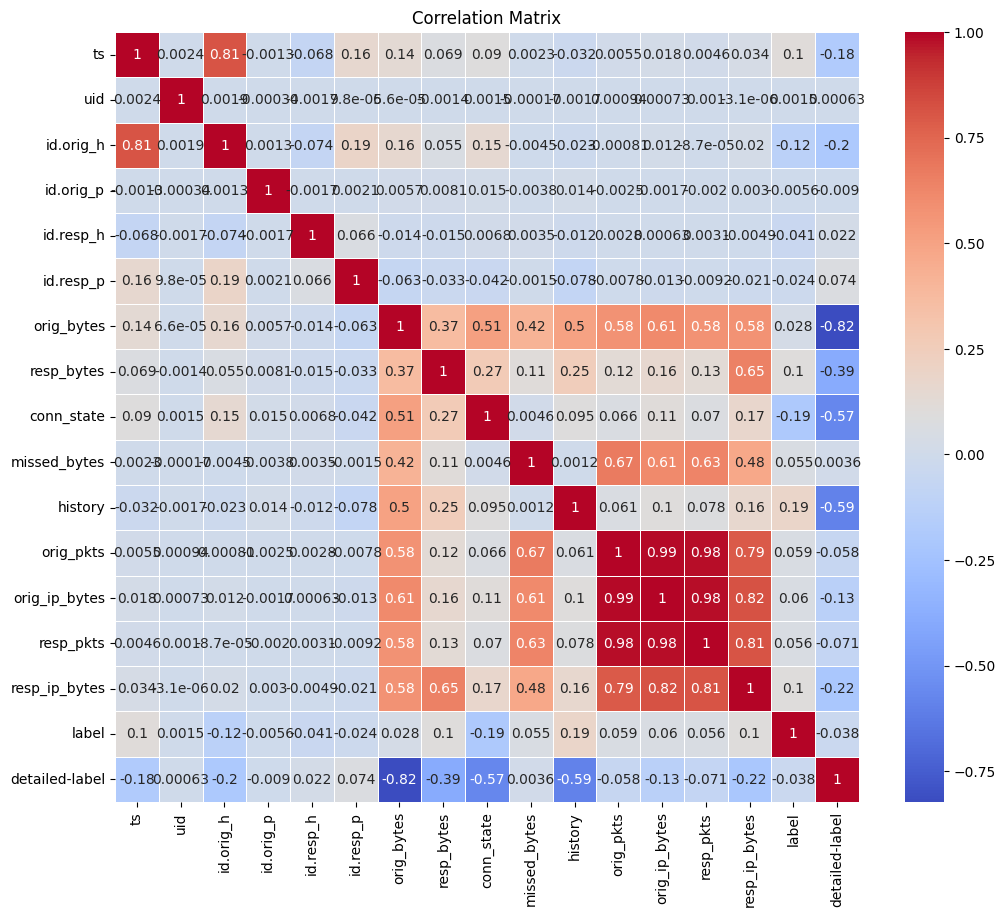

In [ ]:
# sns.heatmap(df_main_new, annot=True, fmt=".1f")
correlation_matrix = df_main_new.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df_main_new = df_main_new.drop(columns = ['proto'])

In [ ]:
for col in df_main_new.columns:
  unique_value = df_main_new[col].nunique()
  print(f'{col} has unique values {unique_value}')

ts has unique values 270012
uid has unique values 270012
id.orig_h has unique values 8
id.orig_p has unique values 28338
id.resp_h has unique values 241834
id.resp_p has unique values 13
duration has unique values 29891
orig_bytes has unique values 152
resp_bytes has unique values 602
conn_state has unique values 10
missed_bytes has unique values 6
history has unique values 138
orig_pkts has unique values 89
orig_ip_bytes has unique values 1284
resp_pkts has unique values 99
resp_ip_bytes has unique values 1465
label has unique values 2
detailed-label has unique values 6


# **Classification**

# **Dimentionality Reduction**

## **PCA**

In [ ]:
df_main = pd.read_csv("/content/drive/MyDrive/Data_Mining/course_project_2/df_main.csv")

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
X = df_main.drop('label',axis=1)
y = df_main['label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
n_components = 0.96  # Replace with the number of components you want
pca = PCA(n_components=n_components)

# Fit and transform the scaled data
X_pca = pca.fit_transform(X_scaled)

In [ ]:
X_pca.shape

(348640, 10)

## **Splitting dataset**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

## **SVM**

### **With PCA**

### **Hard margin**

In [ ]:
hard_margin_svm = svm.SVC(kernel='linear', C=1e6)
hard_margin_svm.fit(X_train, y_train)

In [ ]:
hard_margin_predictions = hard_margin_svm.predict(X_test)
# soft_margin_predictions = soft_margin_svm.predict(X_test)


hard_margin_accuracy = accuracy_score(y_test, hard_margin_predictions)

print("Hard-Margin SVM Accuracy:", hard_margin_accuracy)
classification_report = metrics.classification_report(y_test, hard_margin_predictions)

print(f'classification report {classification_report}')

### **Soft margin**

In [ ]:
soft_margin_svm = svm.SVC(kernel='linear', C=1.0)
soft_margin_svm.fit(X_train, y_train)

In [ ]:
soft_margin_predictions = soft_margin_svm.predict(X_test)
soft_margin_accuracy = accuracy_score(y_test, soft_margin_predictions)
print("Soft-Margin SVM Accuracy:", soft_margin_accuracy)

classification_report = metrics.classification_report(y_test, soft_margin_predictions)

print(f'classification report {classification_report}')

## **Without PCA**

In [ ]:
X = df_main.drop('label',axis=1)
y = df_main['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
size_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = size_scaler.transform(X_train)
X_test_scaled = size_scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

### **Hard margin**

In [ ]:
hard_margin_svm = svm.SVC(kernel='linear', C=1e6)
hard_margin_svm.fit(X_train_scaled, y_train)

In [ ]:
hard_margin_predictions = hard_margin_svm.predict(X_test_scaled)

hard_margin_accuracy = accuracy_score(y_test, hard_margin_predictions)

print("Hard-Margin SVM Accuracy:", hard_margin_accuracy)

classification_report = metrics.classification_report(y_test, hard_margin_predictions)

print(f'classification report {classification_report}')

### **Soft margin**

In [ ]:
soft_margin_svm = svm.SVC(kernel='linear', C=1.0)
soft_margin_svm.fit(X_train_scaled, y_train)

In [ ]:
soft_margin_predictions = soft_margin_svm.predict(X_test_scaled)
soft_margin_accuracy = accuracy_score(y_test, soft_margin_predictions)
print("Soft-Margin SVM Accuracy:", soft_margin_accuracy)
classification_report = metrics.classification_report(y_test, soft_margin_predictions)

print(f'classification report {classification_report}')